In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

df.head()

#remove duplicates
df.dropna(inplace = True)


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
years = list(df.Year.unique())
sorted(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [3]:
#check for missing values
for col in df.columns:
    any_missing = df[col].isnull().mean()
    print(f'{col} - {any_missing :.1%}')

Name - 0.0%
Author - 0.0%
User Rating - 0.0%
Reviews - 0.0%
Price - 0.0%
Year - 0.0%
Genre - 0.0%


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


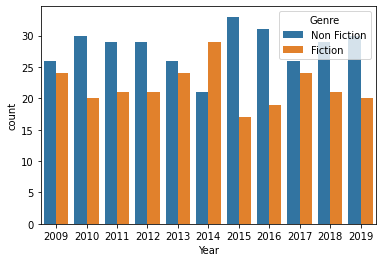

In [4]:
#Count by genre
genre_count = df['Genre'].value_counts()

genre_count

#---------------------
#Non Fiction    310
#Fiction        240
#---------------------

#Distribution of Fiction vs Non fiction book over the years
sns.countplot(df['Year'],hue=df['Genre'])
plt.show()

In [5]:
#top 10 expensive books
topPrice = df.sort_values('Price', ascending=False)\
                                                    .head(10)\
                                                    .reset_index()
topPrice

,index,Name,Author,User Rating,Reviews,Price,Year,Genre
0,69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
1,70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
2,473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
3,151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
4,346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction
5,159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction
6,273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
7,271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
8,272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
9,275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction


In [6]:
#top 15 authors with highest average rating
toprated_authors = df.groupby('Author')[['User Rating']].mean()\
                                                              .sort_values('User Rating', ascending=False)\
                                                              .head(15)\
                                                              .reset_index()

toprated_authors.round(2)


,Author,User Rating
0,Patrick Thorpe,4.90
1,Lin-Manuel Miranda,4.90
2,Chip Gaines,4.90
3,Sherri Duskey Rinker,4.90
4,Nathan W. Pyle,4.90
5,Pete Souza,4.90
6,Sarah Young,4.90
7,Bill Martin Jr.,4.90
8,Dav Pilkey,4.90
9,Rush Limbaugh,4.90


In [7]:
df09 = df[(df.Year == 2009)]
df09.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
25,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
60,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [8]:
df19 = df[(df.Year == 2019)]
df19.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
44,Can't Hurt Me: Master Your Mind and Defy the Odds,David Goggins,4.8,16244,18,2019,Non Fiction
74,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,7955,5,2019,Non Fiction


In [9]:
# 2009 Top 10 authors with most bestsellers
top09_writers = df09.groupby('Author')[['Name']].count()\
                                                     .sort_values('Name', ascending=False)\
                                                     .head(10)\
                                                     .reset_index()

top09_writers

,Author,Name
0,Stephenie Meyer,6
1,Malcolm Gladwell,2
2,Charlaine Harris,2
3,Stieg Larsson,2
4,David Zinczenko,2
5,Jeff Kinney,2
6,Glenn Beck,2
7,Stephen Kendrick,1
8,Muriel Barbery,1
9,Patrick Lencioni,1


In [10]:
# 2019 Top 10 authors with most bestsellers
top19_writers = df19.groupby('Author')[['Name']].count()\
                                                     .sort_values('Name', ascending=False)\
                                                     .head(10)\
                                                     .reset_index()

top19_writers

,Author,Name
0,Dav Pilkey,3
1,Rachel Hollis,2
2,Adir Levy,1
3,Naomi Kleinberg,1
4,Jennifer Smith,1
5,John Grisham,1
6,Lysa TerKeurst,1
7,M Prefontaine,1
8,Margaret Wise Brown,1
9,Marie Kondō,1


In [11]:
#Top 10 authors with most bestsellers
top_writers = df.groupby('Author')[['Name']].count()\
                                                     .sort_values('Name', ascending=False)\
                                                     .head(10)\
                                                     .reset_index()
top_writers

,Author,Name
0,Jeff Kinney,12
1,Gary Chapman,11
2,Suzanne Collins,11
3,Rick Riordan,11
4,American Psychological Association,10
5,Gallup,9
6,Dr. Seuss,9
7,Rob Elliott,8
8,Eric Carle,7
9,Bill O'Reilly,7


In [12]:
#shortening the name of the author to fit the graph
top_writers = top_writers.replace('American Psychological Association', 'APA')

top_writers

,Author,Name
0,Jeff Kinney,12
1,Gary Chapman,11
2,Suzanne Collins,11
3,Rick Riordan,11
4,APA,10
5,Gallup,9
6,Dr. Seuss,9
7,Rob Elliott,8
8,Eric Carle,7
9,Bill O'Reilly,7


Text(0.5, 1.0, 'Top 10 Authors by Number of Bestsellers')

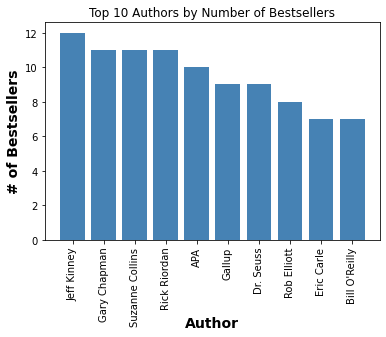

In [13]:
#plot authors with most bestsellers
x = top_writers.Author 
h = top_writers.Name

plt.bar(x, h, color= 'steelblue') 

plt.xticks(rotation=90)

plt.xlabel('Author', fontweight='bold', color = 'black', fontsize='14', verticalalignment='bottom')
plt.ylabel('# of Bestsellers', fontweight='bold', color = 'black', fontsize='14', verticalalignment='bottom')
plt.title('Top 10 Authors by Number of Bestsellers')

In [14]:
#top 5 books with high reviews
top5_books = df.groupby('Name')[['Reviews']].sum()\
                                                    .sort_values('Reviews', ascending=False)\
                                                    .head(5)\
                                                    .reset_index()
top5_books

,Name,Reviews
0,The Fault in Our Stars,201928
1,"Oh, the Places You'll Go!",174672
2,Gone Girl,171813
3,The Girl on the Train,158892
4,"Unbroken: A World War II Story of Survival, Re...",148365


In [15]:
#shortening the name of the book to fit the graph
top5_books = top5_books.replace('Unbroken: A World War II Story of Survival, Resilience, and Redemption', 'A World War II Story')
top5_books

,Name,Reviews
0,The Fault in Our Stars,201928
1,"Oh, the Places You'll Go!",174672
2,Gone Girl,171813
3,The Girl on the Train,158892
4,A World War II Story,148365


Text(0, 0.5, '# of Reviews')

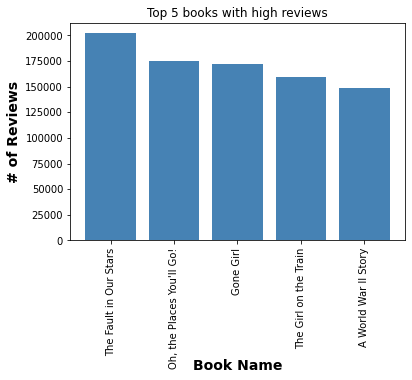

In [16]:
#plot top 5 books with high reviews
x = top5_books.Name
h = top5_books.Reviews

plt.bar(x, h, color= 'steelblue') 

plt.xticks(rotation=90)
plt.title('Top 5 books with high reviews')
plt.xlabel('Book Name', fontweight='bold', color = 'black', fontsize='14', verticalalignment='bottom')
plt.ylabel('# of Reviews', fontweight='bold', color = 'black', fontsize='14', verticalalignment='bottom')


In [17]:
# Box plot for User Rating
rating_box = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])
rating_box.add_trace(go.Box(x=df['User Rating'],name='User Rating'))

rating_box.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

rating_box.update_traces(marker_color='steelblue')

rating_box.show()


In [18]:

#Box plot for Price
price_box = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

price_box.add_trace(go.Box(x=df['Price'],name='Price'))

price_box.update_traces(marker_color='steelblue')

price_box.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

price_box.show()